Equipo 6

Integrantes

● José Daniel Londoño Londoño

● Santiago Londoño Giraldo

● Kevin Andres Blandon Velez

OBJETIVO – Analizar la Participación de Fuerza Laboral

#### Importacion de librerias

In [ ]:
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
from tabulate import tabulate
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances_argmin_min
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
import warnings
warnings.filterwarnings('ignore')




### Exploracion de datos

In [ ]:
# Cargar los datos de hombres y mujeres
female_df = pd.read_csv('/content/Labour force participation rate (% ages 15 and older), female.csv', header=1)
male_df = pd.read_csv('/content/Labour force participation rate (% ages 15 and older), male.csv', header=1)


# **1. Preprocesamiento**

Aplicamos a los datasets las siguientes depuraciones:

Filtrado de Filas No Deseadas: Se elimina cualquier fila que no represente un país específico. Esto es esencial para asegurar que el análisis se enfoque solo en datos a nivel de país y no en agregados regionales o categorías de desarrollo.

Selección de Años de Interés: Se seleccionan los años relevantes (1995, 2005, 2015) para el análisis. Esto permite centrarse en periodos específicos y relevantes para el estudio.

Verificación de Duplicados: Se comprueba que no haya duplicados en los nombres de los países, evitando errores en el análisis posterior.

Reemplazo y Eliminación de Valores Faltantes: Los valores '..' que representan datos faltantes se reemplazan por NaN y luego se eliminan las filas que contienen estos NaN. Esto asegura que solo se trabajen con datos completos y válidos.

Verificación Visual: Finalmente, se imprimen las primeras filas de los dataframes procesados para verificar que el preprocesamiento se ha realizado correctamente.

In [ ]:
# Lista de términos que no son nombres de países
non_country_terms = [
    'Human Development',
    'Very high human development',
    'High human development',
    'Medium human development',
    'Low human development',
    'Developing Countries',
    'Regions',
    'Arab States',
    'East Asia and the Pacific',
    'Europe and Central Asia',
    'Latin America and the Caribbean',
    'South Asia',
    'Sub-Saharan Africa',
    'Least Developed Countries',
    'Small Island Developing States',
    'Organization for Economic Co-operation and Development',
    'World'
]

# Filtrar las filas que no contienen los términos no deseados
male_df = male_df[~male_df['Country'].isin(non_country_terms)]
female_df = female_df[~female_df['Country'].isin(non_country_terms)]

# Seleccionar los años de interés y la columna de país
years_of_interest = ['1995', '2005', '2015']
columns_to_select = ['Country'] + years_of_interest

# Filtrar las columnas por los años de interés
male_data = male_df[['Country'] + years_of_interest]
female_data = female_df[['Country'] + years_of_interest]


# Verificar si hay duplicados en los nombres de los países
print(male_data['Country'].duplicated().sum())  # Debería ser 0
print(female_data['Country'].duplicated().sum())  # Debería ser 0


# Reemplazar los valores '..' por NaN y luego eliminar las filas con NaN
male_data.replace('..', pd.NA, inplace=True)
male_data.dropna(inplace=True)

female_data.replace('..', pd.NA, inplace=True)
female_data.dropna(inplace=True)



# Convertir los valores de las columnas seleccionadas a float
for year in years_of_interest:
    male_data[year] = male_data[year].astype(float)
for year in years_of_interest:
    female_data[year] = female_data[year].astype(float)

# Mostrar las primeras filas del dataframe para verificar
print("---------------Male----------\n",male_data.head())
print("-------------Female----------\n",female_data.head())



1
1
---------------Male----------
        Country  1995  2005  2015
0  Afghanistan  82.5  83.1  82.3
1      Albania  73.9  67.9  65.2
2      Algeria  77.7  71.8  67.4
3       Angola  81.0  80.5  80.4
4    Argentina  75.0  75.6  73.4
-------------Female----------
        Country  1995  2005  2015
0  Afghanistan  43.0  44.0  47.0
1      Albania  53.8  48.1  47.7
2      Algeria  11.8  12.8  15.2
3       Angola  74.8  75.1  75.5
4    Argentina  48.1  49.4  47.8


### Visualización de correlaciones

In [ ]:
# funcion para graficar la correlacion y la distribucion entre variables numericas
def plot_pares(df):
    import matplotlib.pyplot as plt
    import seaborn as sb
    import numpy as np

    num_cols = df.select_dtypes(include=np.number).columns

    # matriz de correlaciones
    grid = sb.pairplot(
        df,
        height=2,
        vars=num_cols,
        kind='scatter'
    )

    def pintarCorr(x, y, **kwargs):
        plt.gca().get_children()[0].remove()

        # calcular correlacion de pearson
        corr = round(np.corrcoef(x, y)[0,1], 2)
        plt.gca().text((max(x) + min(x))/2, (max(y) + min(y))/2, s=str(corr), fontsize=12)


    # pintar la correlacion en la parte inferior de la diagonal
    grid.map_lower(pintarCorr)

    plt.show()

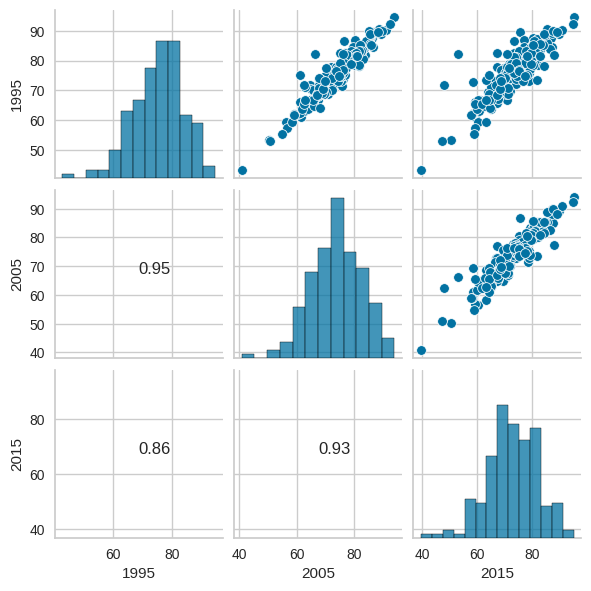

In [ ]:
plot_pares(male_data)

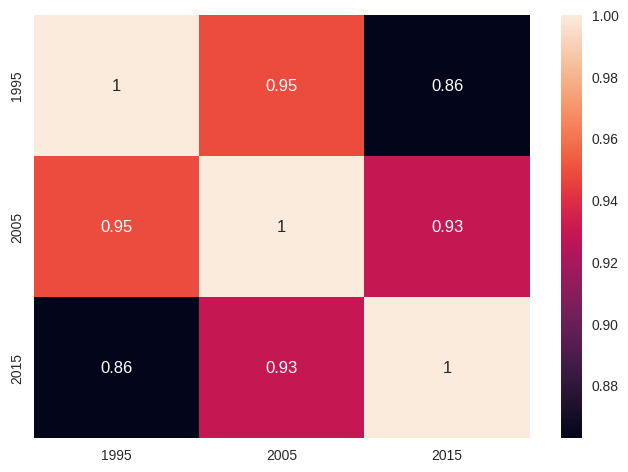

In [ ]:
import seaborn as sns

sns.heatmap(male_data.corr(numeric_only=True), annot=True)

plt.show()

***Interpretación***

Alta Correlación:

Existe una alta correlación positiva entre los valores de los diferentes años. Esto indica que los datos se comportan de manera muy similar a lo largo del tiempo. Por ejemplo, si los valores son altos en 1995, tienden a ser altos también en 2005 y 2015.


Distribución Consistente:

La distribución de los datos parece ser consistente a lo largo de los años, con histogramas que muestran una concentración de valores en el centro y menos valores en los extremos.

Evolución Temporal:

Aunque los coeficientes de correlación son altos, hay una ligera disminución en la correlación entre 1995 y 2015 en comparación con los otros pares de años, lo que podría indicar ligeras variaciones o cambios en los datos a lo largo del tiempo.


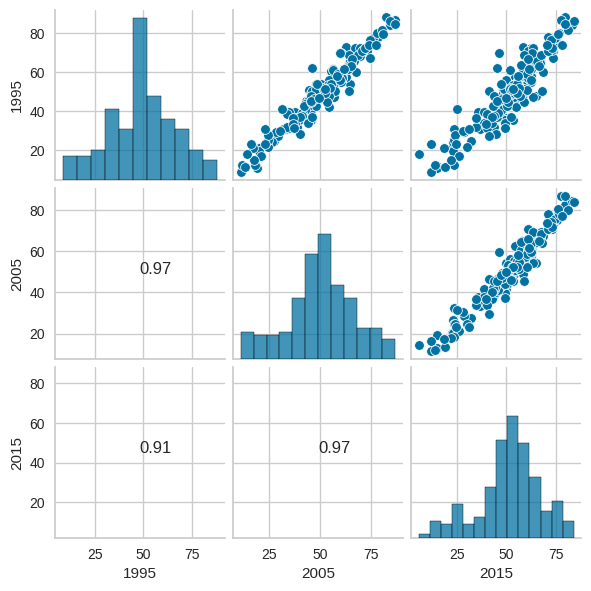

In [ ]:
plot_pares(female_data)

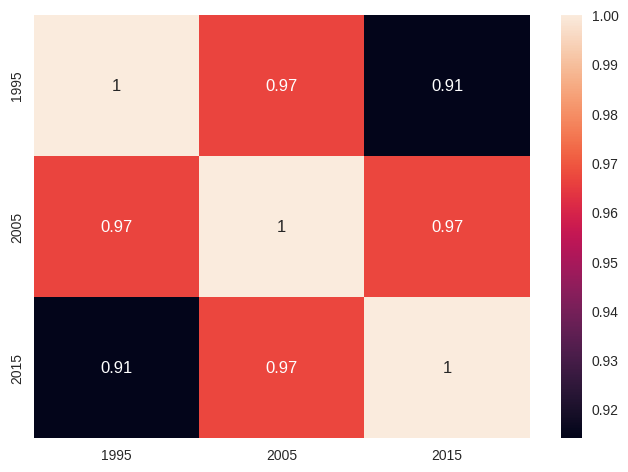

In [ ]:
import seaborn as sns

sns.heatmap(female_data.corr(numeric_only=True), annot=True)

plt.show()

**Conclusiones**

Fuerte Correlación en el Tiempo: Los datos muestran una fuerte correlación positiva entre los años, lo que sugiere que los valores tienden a mantenerse consistentes a lo largo del tiempo. Esto indica estabilidad en las medidas analizadas.

Distribuciones Similares: Las distribuciones de los valores en los histogramas muestran que la mayoría de los datos se encuentran en rangos similares a través de los años, con una tendencia a mejorar (valores más altos) en 2015.

Ligeras Disminuciones en Correlación a Largo Plazo: Aunque las correlaciones son fuertes entre todos los pares de años, la correlación entre 1995 y 2015 es ligeramente menor que entre años más cercanos (1995-2005 y 2005-2015). Esto podría indicar que con el tiempo hay una ligera desviación o variación en las tendencias.

### Aproximación Inicial al Cluster

A continuacion realizamos un primer acercamiento a la division por clusters utilizando el dataset de fueza laboral femenina

In [ ]:
# Seleccionar solo las columnas numéricas para el clustering
data_for_clustering = female_data[[f"{year}" for year in years_of_interest]]

# Convertir los datos a formato adecuado para clustering (numpy array)
X = np.array(data_for_clustering)

# Inicializar el modelo de clustering
kmeans = KMeans(n_clusters=3, random_state=42)

# Ajustar el modelo
kmeans.fit(X)

# Obtener las etiquetas de clúster
cluster_labels = kmeans.labels_

# Agregar las etiquetas de clúster al dataframe original
female_data['Cluster'] = cluster_labels

# Mostrar las primeras filas del dataframe con las etiquetas de clúster
print(female_data)


                                Country  1995  2005  2015  Cluster
0                           Afghanistan  43.0  44.0  47.0        2
1                               Albania  53.8  48.1  47.7        2
2                               Algeria  11.8  12.8  15.2        0
3                                Angola  74.8  75.1  75.5        1
4                             Argentina  48.1  49.4  47.8        2
..                                  ...   ...   ...   ...      ...
175  Venezuela (Bolivarian Republic of)  46.7  49.7  50.1        2
176                            Viet Nam  72.4  71.7  73.0        1
177                               Yemen  17.8  14.4   6.1        0
178                              Zambia  73.8  73.7  70.5        1
179                            Zimbabwe  73.6  77.1  78.1        1

[180 rows x 5 columns]


A continuacion realizamos un primer acercamiento a la division por clusters utilizando el dataset de fueza laboral masculina

In [ ]:
# Seleccionar solo las columnas numéricas para el clustering
data_for_clustering1 = male_data[[f"{year}" for year in years_of_interest]]

# Convertir los datos a formato adecuado para clustering (numpy array)
Y = np.array(data_for_clustering1)

# Inicializar el modelo de clustering
kmeans1 = KMeans(n_clusters=3, random_state=42)

# Ajustar el modelo
kmeans1.fit(Y)

# Obtener las etiquetas de clúster
cluster_labels1 = kmeans1.labels_

# Agregar las etiquetas de clúster al dataframe original
#merged_data['Cluster'] = cluster_labels
male_data['Cluster'] = cluster_labels1

# Mostrar las primeras filas del dataframe con las etiquetas de clúster
#print(merged_data.head())
print(male_data)


                                Country  1995  2005  2015  Cluster
0                           Afghanistan  82.5  83.1  82.3        2
1                               Albania  73.9  67.9  65.2        1
2                               Algeria  77.7  71.8  67.4        0
3                                Angola  81.0  80.5  80.4        2
4                             Argentina  75.0  75.6  73.4        0
..                                  ...   ...   ...   ...      ...
175  Venezuela (Bolivarian Republic of)  81.5  80.6  78.0        2
176                            Viet Nam  81.6  80.8  83.0        2
177                               Yemen  73.1  69.9  68.8        0
178                              Zambia  85.4  85.7  80.2        2
179                            Zimbabwe  89.6  88.2  88.9        2

[180 rows x 5 columns]


In [ ]:
# Mostrar distribucion de datos por cluster
cluster_summary = female_data['Cluster'].value_counts()
print(cluster_summary)


Cluster
2    101
1     41
0     38
Name: count, dtype: int64


In [ ]:
# Mostrar distribucion de datos por cluster
cluster_summary = male_data['Cluster'].value_counts()
print(cluster_summary)

Cluster
0    72
2    56
1    52
Name: count, dtype: int64


#### Comparación entre datos

Index(['Country', '1995', '2005', '2015', 'Cluster'], dtype='object')
       Country  1995  2005  2015  Cluster
0  Afghanistan  43.0  44.0  47.0        2
1      Albania  53.8  48.1  47.7        2
2      Algeria  11.8  12.8  15.2        0
3       Angola  74.8  75.1  75.5        1
4    Argentina  48.1  49.4  47.8        2


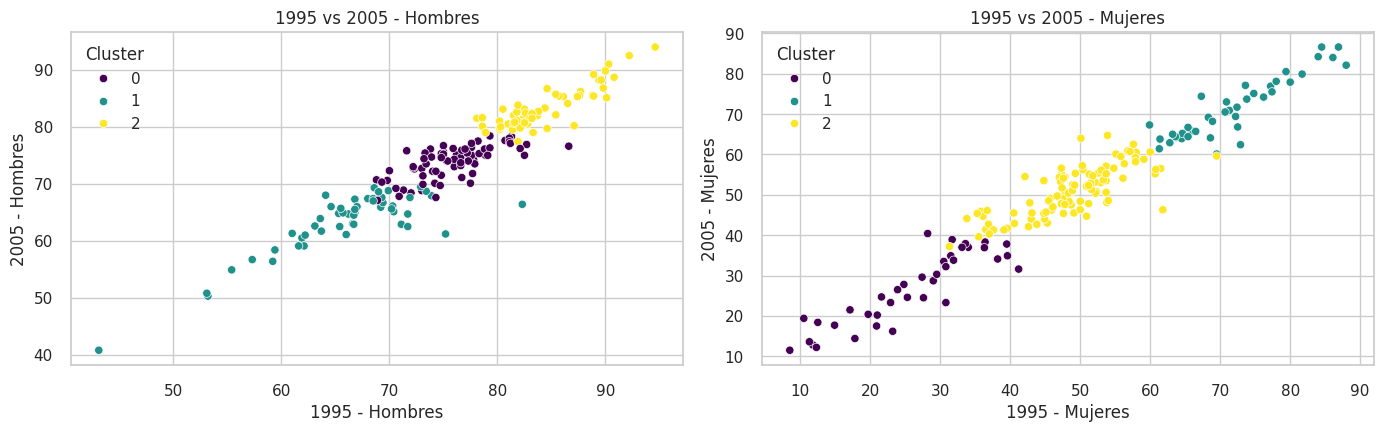

In [ ]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Verificar la existencia de las columnas y los datos
print(female_data.columns)
print(female_data.head())

# Crear el gráfico de dispersión para 1995 vs 2005, hombres y mujeres
plt.figure(figsize=(14, 8))

# 1995 vs 2005 para hombres
plt.subplot(2, 2, 1)
sns.scatterplot(data=male_data, x='1995', y='2005', hue='Cluster', palette='viridis')
plt.title('1995 vs 2005 - Hombres')
plt.xlabel('1995 - Hombres')
plt.ylabel('2005 - Hombres')

# 1995 vs 2005 para mujeres
plt.subplot(2, 2, 2)
sns.scatterplot(data=female_data, x='1995', y='2005', hue='Cluster', palette='viridis')
plt.title('1995 vs 2005 - Mujeres')
plt.xlabel('1995 - Mujeres')
plt.ylabel('2005 - Mujeres')


plt.tight_layout()
plt.show()


**Gráfico 1: Hombres (1995 vs 2005)**


Clusterización:

Cluster 0 (color púrpura): Representa a paises que comenzaron con bajas puntuaciones en 1995 y también tienen puntuaciones bajas en 2005.

Cluster 1 (color verde): Representa a paises que comenzaron con puntuaciones moderadas en 1995 y tienen puntuaciones similares en 2005.

Cluster 2 (color amarillo): Representa a paises que comenzaron con puntuaciones altas en 1995 y mantuvieron o aumentaron esas puntuaciones en 2005.
Tendencia:

Existe una clara tendencia positiva, es decir, las puntuaciones de 2005 tienden a ser mayores o iguales que las de 1995 para la mayoría de los individuos.


**Gráfico 2: Mujeres (1995 vs 2005) **

Clusterización:

Cluster 0 (color púrpura): Representa a mujeres que comenzaron con puntuaciones bajas en 1995 y también tienen puntuaciones bajas en 2005.

Cluster 1 (color verde): Representa a mujeres que comenzaron con puntuaciones moderadas en 1995 y tienen puntuaciones similares en 2005.

Cluster 2 (color amarillo): Representa a mujeres que comenzaron con puntuaciones altas en 1995 y mantuvieron o aumentaron esas puntuaciones en 2005.
Tendencia:

Similar al gráfico de los hombres, existe una tendencia positiva donde las puntuaciones de 2005 son generalmente mayores o iguales que las de 1995.


**Conclusiones**

Correlación Temporal: Tanto para hombres como para mujeres, hay una fuerte correlación positiva entre las puntuaciones de 1995 y 2005, lo que sugiere que las puntuaciones de un año son un buen predictor de las puntuaciones en el otro año.

Grupos de Desempeño: La existencia de tres clusters indica que hay grupos bien definidos de desempeño (bajo, medio, alto) que se mantienen a lo largo del tiempo.

### Agrupacion inicial por clusters en datos de Mujeres

In [ ]:
# Agrupar los datos por clúster
clusters = female_data.groupby('Cluster')['Country'].apply(list)

# Imprimir los países en cada clúster
for cluster, countries in clusters.items():
    print(f"Cluster {cluster}:")
    for country in countries:
        print(f" - {country}")
    print("\n")


Cluster 0:
 - Algeria
 - Bahrain
 - Bangladesh
 - Bosnia and Herzegovina
 - Comoros
 - Cuba
 - Egypt
 - Eswatini (Kingdom of)
 - Fiji
 - Gabon
 - Guyana
 - India
 - Iran (Islamic Republic of)
 - Iraq
 - Italy
 - Jordan
 - Lebanon
 - Libya
 - Maldives
 - Malta
 - Mauritania
 - Morocco
 - Oman
 - Pakistan
 - Palestine, State of
 - Samoa
 - Saudi Arabia
 - Senegal
 - Somalia
 - Sri Lanka
 - Sudan
 - Suriname
 - Syrian Arab Republic
 - Tajikistan
 - Timor-Leste
 - Tunisia
 - Turkey
 - Yemen


Cluster 1:
 - Angola
 - Bahamas
 - Barbados
 - Benin
 - Burkina Faso
 - Burundi
 - Cambodia
 - Cameroon
 - Central African Republic
 - Chad
 - China
 - Congo
 - Congo (Democratic Republic of the)
 - Eritrea
 - Ethiopia
 - Ghana
 - Guinea
 - Guinea-Bissau
 - Iceland
 - Kazakhstan
 - Kenya
 - Korea (Democratic People's Rep. of)
 - Lao People's Democratic Republic
 - Lesotho
 - Madagascar
 - Malawi
 - Mozambique
 - Nepal
 - Niger
 - Rwanda
 - Sierra Leone
 - Solomon Islands
 - South Sudan
 - Tanzania (Un

Clúster 0
Características:

Diversidad económica: Incluye países altamente desarrollados (EE.UU., Japón) y en desarrollo (Uganda, Sudán).
Economías avanzadas y emergentes: Países como Brasil, Turquía, Rusia, y Sudáfrica.
Ejemplos:

Estados Unidos, Japón, Brasil, Turquía, Canadá, Noruega, Reino Unido.


Clúster 1
Características:

Predominancia de países europeos, muchos miembros de la Unión Europea.
Variedad de desarrollo económico: Ingresos medios y altos.
Ejemplos:

Alemania, Francia, Italia, España, Polonia, Grecia, Hungría.


Clúster 2
Características:

Alta prevalencia de países en desarrollo y menos desarrollados.
Variedad geográfica amplia con desafíos económicos y sociales.
Ejemplos:

India, China, Nigeria, Bangladesh, Venezuela, Pakistán.

Conclusiones
Clúster 0: Gran diversidad económica y geográfica.
Clúster 1: Principalmente países europeos con economías de mercado.
Clúster 2: Predominan países en desarrollo con desafíos significativos.


### Agrupacion inicial por clusters en datos de Hombres

In [ ]:
# Agrupar los datos por clúster
clusters = male_data.groupby('Cluster')['Country'].apply(list)

# Imprimir los países en cada clúster
for cluster, countries in clusters.items():
    print(f"Cluster {cluster}:")
    for country in countries:
        print(f" - {country}")
    print("\n")

Cluster 0:
 - Algeria
 - Argentina
 - Australia
 - Azerbaijan
 - Barbados
 - Benin
 - Bhutan
 - Botswana
 - Brazil
 - Brunei Darussalam
 - Cabo Verde
 - Canada
 - Chile
 - Congo
 - Congo (Democratic Republic of the)
 - Cyprus
 - Czechia
 - Côte d'Ivoire
 - Denmark
 - Djibouti
 - Dominican Republic
 - Egypt
 - Fiji
 - Georgia
 - Ghana
 - Guyana
 - Haiti
 - Hong Kong, China (SAR)
 - Iran (Islamic Republic of)
 - Iraq
 - Ireland
 - Israel
 - Jamaica
 - Japan
 - Kazakhstan
 - Kenya
 - Korea (Republic of)
 - Kyrgyzstan
 - Lebanon
 - Lesotho
 - Libya
 - Malaysia
 - Maldives
 - Mauritius
 - Morocco
 - Netherlands
 - New Zealand
 - Norway
 - Palestine, State of
 - Philippines
 - Russian Federation
 - Saint Lucia
 - Sao Tome and Principe
 - Saudi Arabia
 - Singapore
 - Somalia
 - South Sudan
 - Sri Lanka
 - Sudan
 - Switzerland
 - Syrian Arab Republic
 - Tonga
 - Trinidad and Tobago
 - Tunisia
 - Turkey
 - Turkmenistan
 - Uganda
 - United Kingdom
 - United States
 - Uruguay
 - Uzbekistan
 - Yem

Clúster 0
Características:

Predominancia de países de Medio Oriente, África del Norte y Asia del Sur.
Incluye países con diversos niveles de desarrollo, muchos enfrentando desafíos políticos y económicos.

Ejemplos:
India, Italia, Arabia Saudita, Egipto, Irán, Turquía, Somalia.


Clúster 1
Características:

Mayoría de países africanos y algunos asiáticos.
Muchos son países en desarrollo o menos desarrollados, enfrentando significativos desafíos económicos y sociales.

Ejemplos:
China, Ghana, Etiopía, Kenia, Vietnam, Zambia, Corea del Norte.


Clúster 2
Características:

Gran diversidad geográfica y económica, incluyendo países de Europa, América, Asia y Oceanía.
Incluye tanto economías desarrolladas como emergentes.

Ejemplos:
Estados Unidos, Alemania, Brasil, Australia, Japón, Canadá, España.

Conclusiones

Clúster 0: Predomina el Medio Oriente, África del Norte y Asia del Sur con países en diversos niveles de desarrollo y desafíos económicos y políticos.

Clúster 1: Mayormente países africanos y algunos asiáticos, con desafíos económicos y sociales significativos.

Clúster 2: Diversidad global con países de Europa, América, Asia y Oceanía, incluyendo tanto economías desarrolladas como emergentes.


# **2. Cantidad optima de clusters**

Para estimar la cantidad óptima de clusters se usarán los siguientes métodos:


1.   Curva de codo.
2.   Análisis de la silueta.
3.   Estadístico de gap.
4.   Dendograma.

Analisis datos mujeres

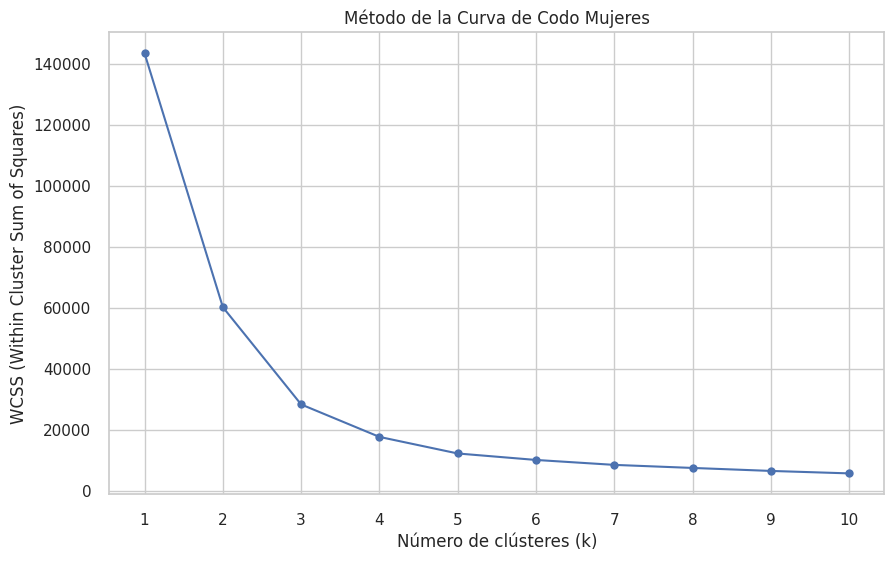

In [ ]:
# Inicializar la lista para almacenar los valores de WCSS
wcss = []

# Calcular WCSS para diferentes valores de k
for k in range(1, 11):  # Probamos desde 1 hasta 10 clústeres
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # Inertia_ calcula la suma de los cuadrados de las distancias dentro de los clústeres

# Graficar la curva de codo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Método de la Curva de Codo Mujeres')
plt.xlabel('Número de clústeres (k)')
plt.ylabel('WCSS (Within Cluster Sum of Squares)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

Este método relaciona la inercia con el número de clústeres en un gráfico, donde la inercia se define como la suma de las distancias al cuadrado de cada objeto dentro del clúster a su centroide. Según esto, el número óptimo de clústeres se identifica donde se observa un cambio abrupto en la relación. En este caso, dicho cambio abrupto se produce en dos clústeres. No obstante, debido a la evolución de la inercia a lo largo de la gráfica, también podría considerarse tres clústeres como el número óptimo.

Analisis datos hombres

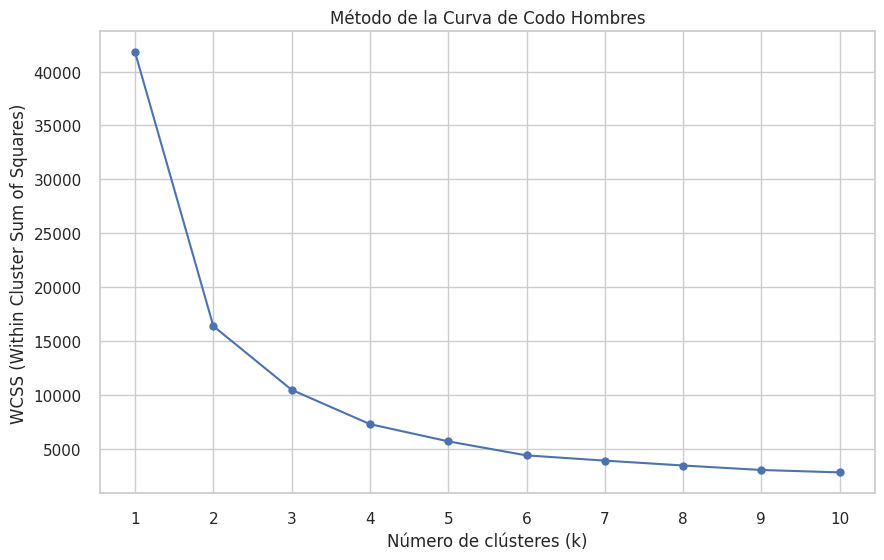

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Inicializar la lista para almacenar los valores de WCSS
wcss1 = []

# Calcular WCSS para diferentes valores de k
for k in range(1, 11):  # Probamos desde 1 hasta 10 clústeres
    kmeans1 = KMeans(n_clusters=k, random_state=42)
    kmeans1.fit(Y)
    wcss1.append(kmeans1.inertia_)  # Inertia_ calcula la suma de los cuadrados de las distancias dentro de los clústeres

# Graficar la curva de codo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss1, marker='o', linestyle='-', color='b')
plt.title('Método de la Curva de Codo Hombres')
plt.xlabel('Número de clústeres (k)')
plt.ylabel('WCSS (Within Cluster Sum of Squares)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

Este método relaciona la inercia con el número de clústeres en un gráfico, donde la inercia se define como la suma de las distancias al cuadrado de cada objeto dentro del clúster a su centroide. Según esto, el número óptimo de clústeres se identifica donde se observa un cambio abrupto en la relación. En este caso, dicho cambio abrupto se produce en dos clústeres. No obstante, debido a la evolución de la inercia a lo largo de la gráfica, también podría considerarse tres clústeres como el número óptimo.

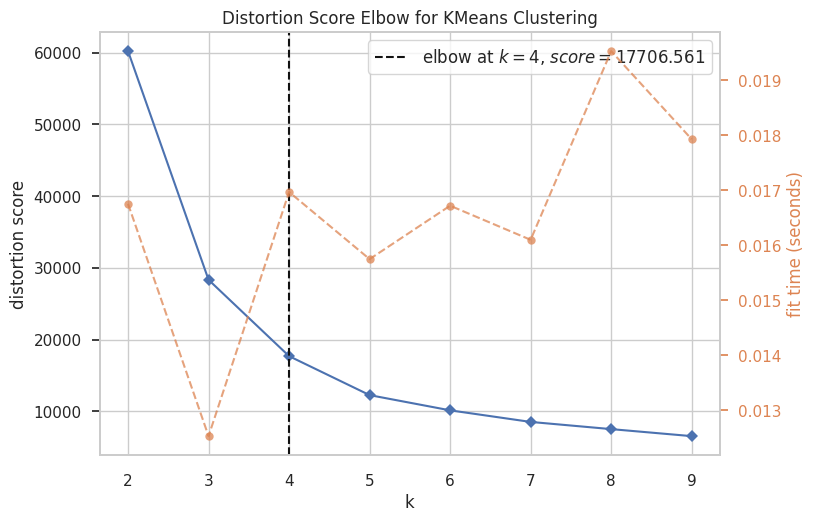

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Instanciar el modelo de KMeans y el visualizador para la curva del codo
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2, 10))

# Ajustar los datos al visualizador
visualizer.fit(X)

# Mostrar la figura
visualizer.show()


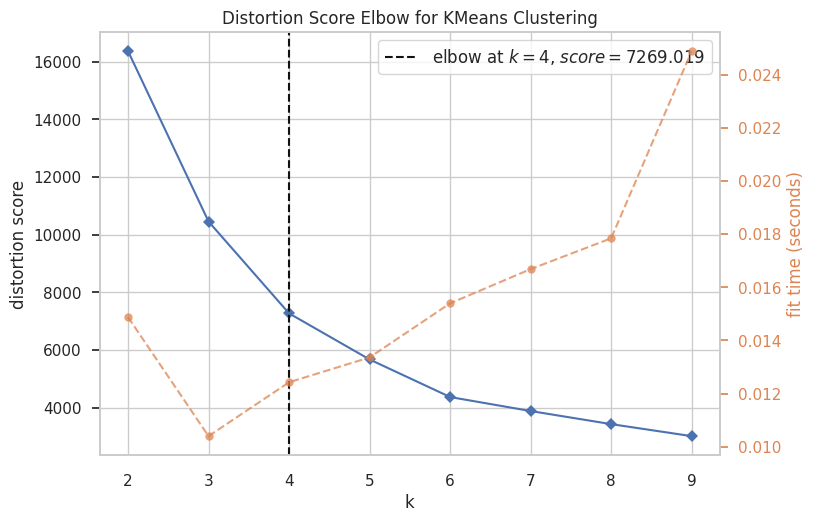

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Instanciar el modelo de KMeans y el visualizador para la curva del codo
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2, 10))

# Ajustar los datos al visualizador
visualizer.fit(Y)

# Mostrar la figura
visualizer.show()

# **Método Análisis de la Silueta**

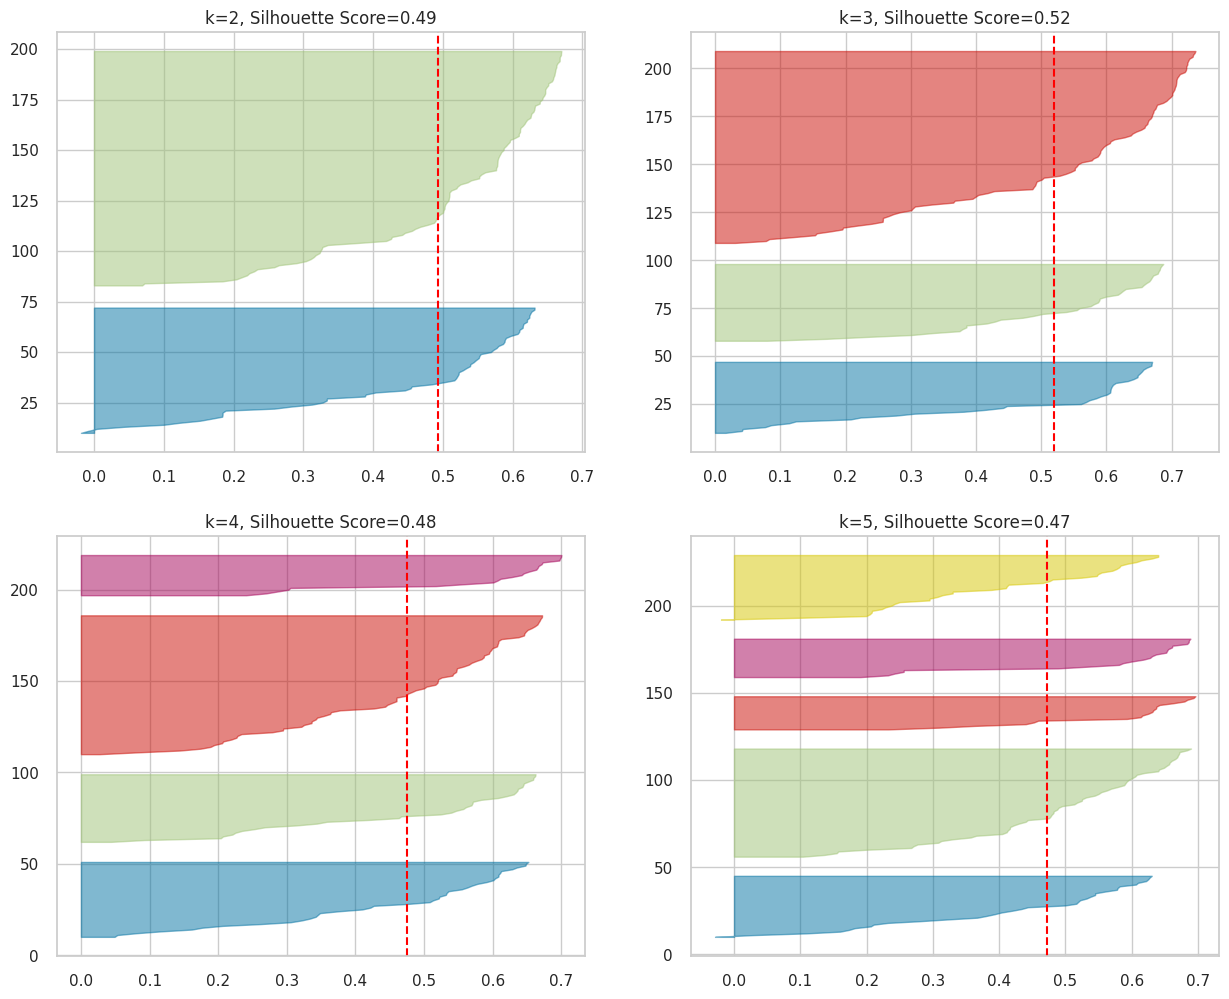

In [ ]:
# Configurar la visualización de silueta con múltiples subplots
fig, ax = plt.subplots(2, 2, figsize=(15, 12))

for i, k in enumerate([2, 3, 4, 5]):
    # Instanciar el modelo de KMeans con un número específico de clústeres
    model = KMeans(n_clusters=k, random_state=42)

    # Configurar el subplot correspondiente para la visualización de silueta
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick', ax=ax[q][mod])
    visualizer.fit(X)

    # Agregar el score en la parte superior del gráfico
    silhouette_avg = visualizer.silhouette_score_
    ax[q][mod].set_title(f'k={k}, Silhouette Score={silhouette_avg:.2f}')

plt.show()

# **Justificación de la Elección de k**
# **Mujeres**



*   Máxima Puntuación de Silueta: La puntuación de silueta más alta se obtiene con k = 2 (0.52), lo que indica la mejor calidad de agrupación.
Claridad y Separación de Clusters: Visualmente, los clusters con k = 2 son los más claros y menos solapados, indicando una mejor definición y separación entre grupos.


*   Claridad y Separación de Clusters: Visualmente, los clusters con k = 2 son los más claros y menos solapados, indicando una mejor definición y separación entre grupos.


*   Simplicidad del Modelo: Un modelo con menos clusters es más simple y puede ser más fácil de interpretar, especialmente cuando se analizan datos complejos como la participación de la fuerza laboral femenina en diferentes países.

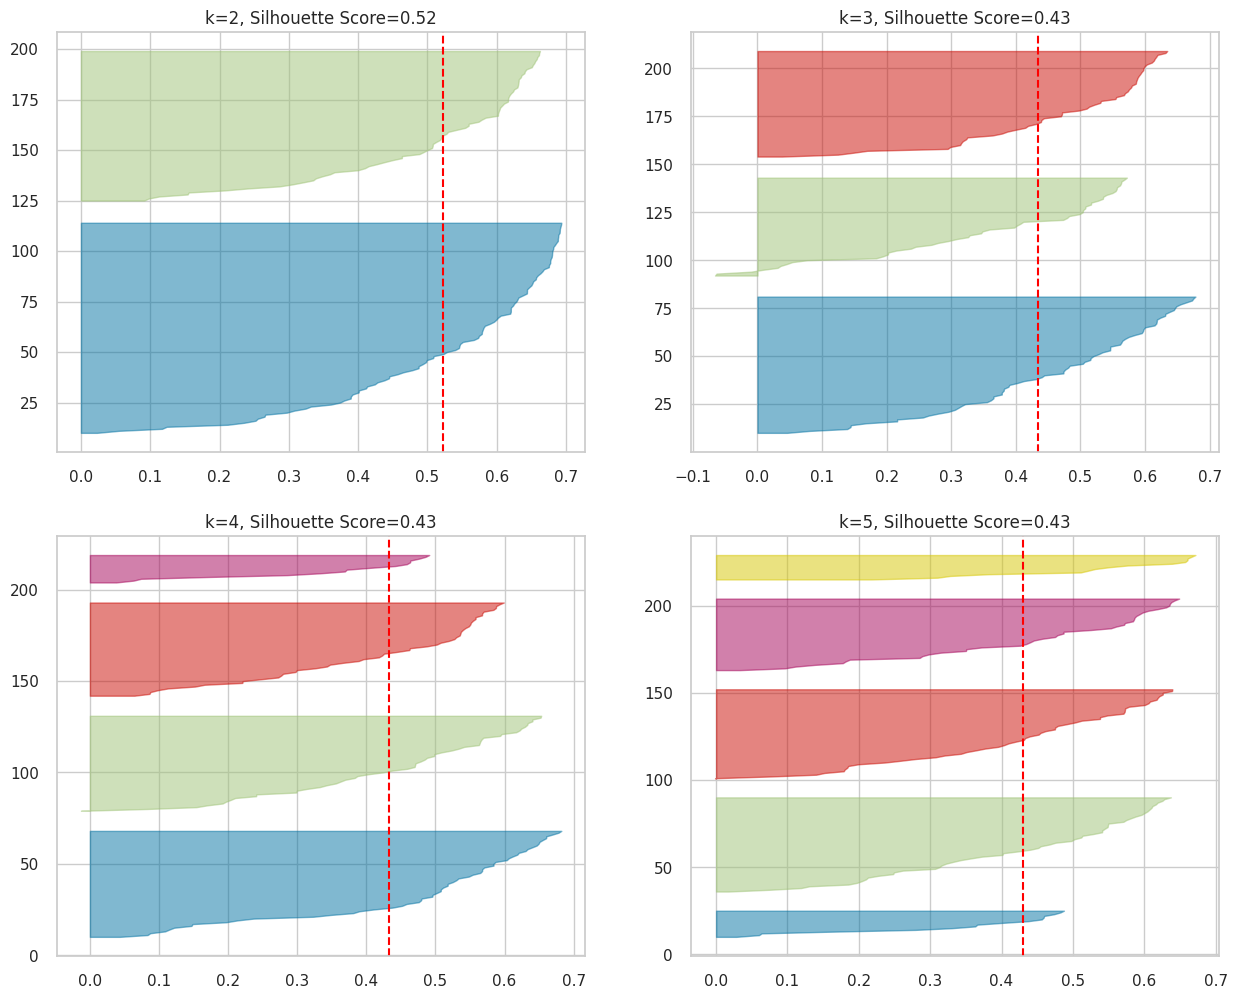

In [ ]:
# Configurar la visualización de silueta con múltiples subplots
fig, ax = plt.subplots(2, 2, figsize=(15, 12))

for i, k in enumerate([2, 3, 4, 5]):
    # Instanciar el modelo de KMeans con un número específico de clústeres
    model1 = KMeans(n_clusters=k, random_state=42)

    # Configurar el subplot correspondiente para la visualización de silueta
    q, mod = divmod(i, 2)
    visualizer1 = SilhouetteVisualizer(model1, colors='yellowbrick', ax=ax[q][mod])
    visualizer1.fit(Y)

    # Agregar el score en la parte superior del gráfico
    silhouette_avg = visualizer1.silhouette_score_
    ax[q][mod].set_title(f'k={k}, Silhouette Score={silhouette_avg:.2f}')

plt.show()

# **Justificación de la Elección de k**
# **Hombres**


*   Máxima Puntuación de Silueta: La puntuación de silueta más alta se obtiene con k = 3 (0.52). Esto sugiere que tres clusters proporcionan la mejor calidad


de agrupación en términos de cohesión interna y separación entre grupos.

*   Aumentar el número de clusters a k = 4 y k = 5 disminuye la puntuación de silueta, lo que indica una menor calidad de agrupación y mayor superposición entre clusters.

*   La disminución en la calidad de agrupación al aumentar el número de clusters, lo que sugiere que más clusters introducen ruido y superposición.



# **Método Estadístico de gap**

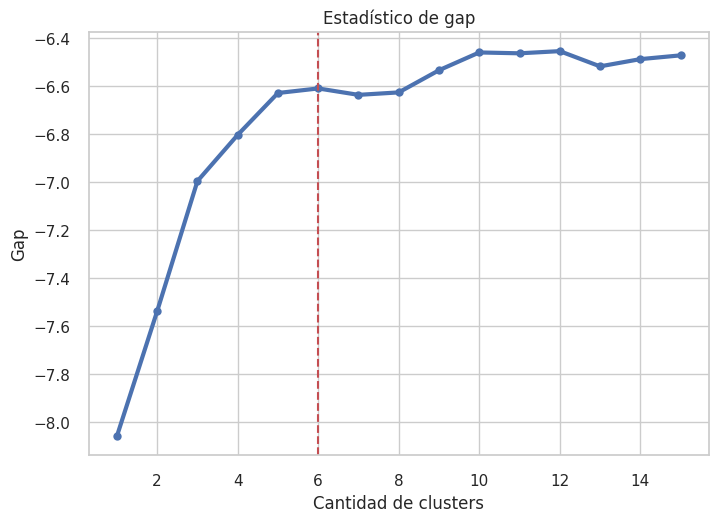

In [ ]:
# nrefs es la cantidad de datos ("datasets") de referencia contra los que se va a comparar
def GAPstatistic(data, maxClusters=15, nrefs=3):
    from sklearn.cluster import KMeans

    gaps = np.zeros((maxClusters,))
    results = {'clusterCount':[], 'gap':[]}
    for gap_index, k in enumerate(range(1, maxClusters+1)):

        # guardara los resultados de dispersión de cada distribución simulada
        refDisps = np.zeros(nrefs)

        # Genera las muestras aleatorias indicadas con nrefs y ejecuta k-means
        # en cada bucle obteniendo los resultados de dispersión (inercia)
        # para cada conjunto generado.
        for i in range(nrefs):

            # Crea nuevo conjunto aleatorio de referencia
            # Se puede usar una semilla para tener reproducibilidad
            np.random.seed(0)
            randomReference = np.random.random_sample(size=data.shape)

            # se ajusta el modelo al conjunto de referencia
            km = KMeans(k, n_init="auto")
            km.fit(randomReference)
            # se guarda la dispersión obtenida
            refDisp = km.inertia_
            refDisps[i] = refDisp

        # Se ajusta el modelo a los datos originales y se guarda su inercia
        km = KMeans(k, n_init="auto")
        km.fit(data)

        origDisp = km.inertia_

        # Calcula el estadístico de gap para k clusters usando el promedio de
        # las dispersiones de los datos simulados y la dispersión de los datos originales.
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)

        # Guarda el estadístico de gap obtenido en este bucle.
        gaps[gap_index] = gap

        results['clusterCount'].append(k)
        results['gap'].append(gap)

    # Selecciona el "primer máximo" de los estadísticos obtenidos y devuelve
    # su respectivo número de clusters
    optK = 0
    for i in range(0, len(gaps)-1):
      if gaps[i+1] <= gaps[i]:
        optK = i+1
        break

    plt.figure()

    plt.plot(results['clusterCount'], results['gap'], linewidth=3, marker='o')
    plt.axvline(x=optK, color='r', linestyle='--')

    plt.xlabel('Cantidad de clusters')
    plt.ylabel('Gap')
    plt.title('Estadístico de gap')
    plt.show()



GAPstatistic(X)

# **Justificación de la Elección de k**
# **Mujeres**

Para la participación de la fuerza laboral de mujeres en los países, k = 6 es el número óptimo de clusters según el método estadístico de gap. Esta elección está justificada por:

*   Valor óptimo de k: El número óptimo de clusters es el que corresponde al primer pico más alto antes de que el valor del gap se estabilice. En este caso, parece que el valor óptimo de k es 6, ya que a partir de este punto, el incremento del valor del gap es muy pequeño o se estabiliza.

*   Recomendación: Se recomienda utilizar 6 clusters para este conjunto de datos para obtener una buena segmentación sin incurrir en sobreajuste.

Por lo tanto, para el análisis de la participación de la fuerza laboral de mujeres, se recomienda utilizar seis clusters, ya que proporciona la mejor calidad de agrupación según el método del gap.


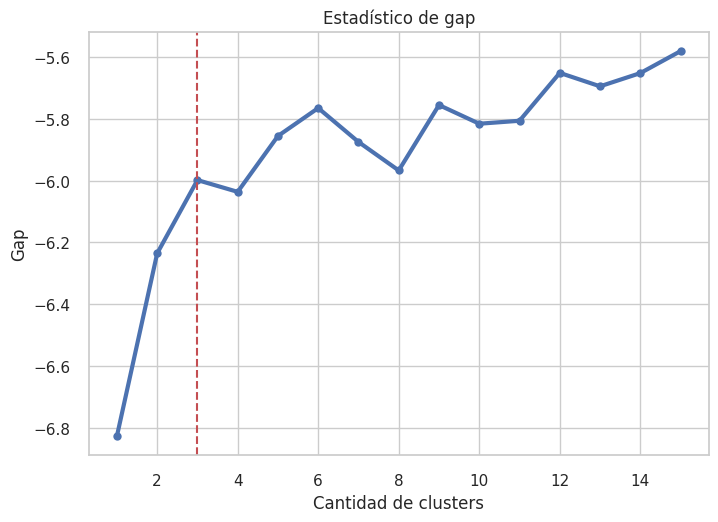

In [ ]:
GAPstatistic(Y)

# **Justificación de la Elección de k**
# **Hombres**

Para la participación de la fuerza laboral de hombres en los países, k = 3 es el número óptimo de clusters según el método estadístico de gap. Esta elección está justificada por:

*   Pico en el Valor del Gap: El valor más alto del gap se encuentra en k = 3, indicando una mejor calidad de la agrupación en comparación con otros valores de k.
*   Estabilidad del Valor del Gap: La falta de incremento significativo en el valor del gap para k > 3 sugiere que no se obtiene una mejora en la agrupación con más clusters.

Por lo tanto, para el análisis de la participación de la fuerza laboral de honbres, se recomienda utilizar tres clusters, ya que proporciona la mejor calidad de agrupación según el método del gap.

# Justificación de la Elección de 𝑘 final k=3

**Datos de las Mujeres**

**Método del Codo:**
𝑘 = 3

El método del codo identifica 𝑘 = 3 como el punto donde la disminución en la suma de los errores cuadrados dentro del grupo empieza a ser menos pronunciada. Este punto de "codo" sugiere que aumentar el número de clusters más allá de 3 no proporciona una mejora significativa en la compactación de los clusters.
La elección de 𝑘 = 3 con este método indica una buena separación entre clusters y una adecuada reducción en la dispersión dentro de los mismos.

**Método de la Silueta:**
𝑘 = 2

El método de la silueta sugiere 𝑘 =2 como el número óptimo de clusters, basado en el coeficiente de silueta, que mide la cohesión y la separación de los clusters.

Aunque 𝑘 = 2 presenta el mayor coeficiente de silueta, la diferencia entre k=2 y 𝑘=3 puede no ser suficientemente significativa como para descartar k=3. Además, la interpretación de los resultados puede ser más rica con tres clusters, proporcionando una mayor granularidad en el análisis.

**Método de Gap:**
𝑘 = 6

Este método sugiere 𝑘 = 6 como óptimo al maximizar la estadística de gap, que compara la inercia de los clusters con la inercia esperada bajo una distribución aleatoria.

Aunque 𝑘 = 6 maximiza la estadística de gap, tener seis clusters puede complicar la interpretación y el análisis práctico de los datos. Además, k=3 ya proporciona una segmentación significativa con suficiente separación entre clusters.


**Datos de los Hombres**

**Método del Codo:**

k=2

Similar al caso de las mujeres, el método del codo identifica k=2 como el punto de inflexión donde la disminución en la inercia comienza a ser menos pronunciada.

Aunque k=2 es sugerido, k=3 sigue siendo una opción viable si la diferencia en la inercia no es drástica entre k=2 y k=3. Tres clusters pueden ofrecer una mejor separación y una interpretación más rica de los datos.

**Método de la Silueta:**

k=3

El método de la silueta indica k=3 como el número óptimo de clusters, mostrando una buena separación y cohesión entre los clusters.
Este resultado refuerza la elección de k=3, asegurando que los clusters están bien definidos y separados.

**Método de Gap:**
𝑘=3

El método de gap sugiere k=3 como óptimo, lo que indica una buena separación de los clusters comparada con una distribución aleatoria.
Este respaldo adicional para 𝑘 = 3 proporciona una sólida justificación para elegir tres clusters, ya que maximiza la separación sin complicar el análisis con demasiados clusters.

**Consideraciones Generales**
Consistencia: Elegir 𝑘=3 proporciona consistencia entre los géneros, facilitando la comparación directa y el análisis conjunto de los datos.

Simplicidad y Utilidad: Tres clusters son fáciles de interpretar y manejar, proporcionando suficiente granularidad para análisis detallados sin sobrecomplicar la segmentación.

Significado Práctico: Tres clusters pueden reflejar distintas categorías significativas (como baja, media y alta participación) que son útiles para la toma de decisiones y el análisis estratégico.

# **3. Agrupamiento jerárquico**

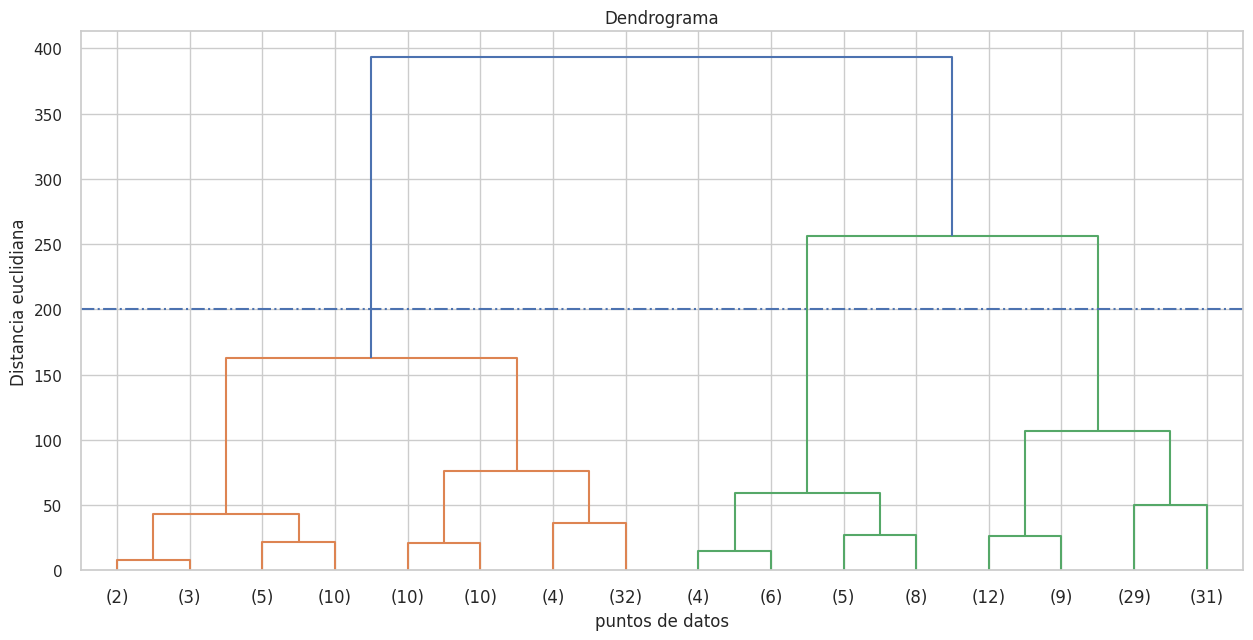

In [ ]:
def Dendograma(data, lines=[]):
    """
    Genera y visualiza un dendrograma para los datos proporcionados, con opciones para trazar líneas horizontales a alturas especificadas.

    Parámetros:
    data : array-like, shape (n_samples, n_features)
        Matriz de datos para la cual se generará el dendrograma.
    lines : list, optional
        Lista de alturas a las que se dibujarán líneas horizontales en el dendrograma.

    Retorna:
    None
    """
    import scipy.cluster.hierarchy as shc
    import matplotlib.pyplot as plt

    # Configurar el tamaño de la figura del dendrograma
    plt.figure(figsize=(15, 7))
    plt.title("Dendrograma")

    # Generar el dendrograma utilizando el método de enlace de Ward
    dend = shc.dendrogram(shc.linkage(data, method='ward'), truncate_mode='level', p=3)

    # Dibujar líneas horizontales en las alturas especificadas en 'lines'
    for l in lines:
        plt.axhline(y=l, color='b', linestyle='-.')

    # Etiquetas de los ejes
    plt.ylabel('Distancia euclidiana')
    plt.xlabel('puntos de datos')

    # Mostrar el gráfico
    plt.show()

# Llamada a la función Dendograma con datos de las mujeres y una línea horizontal a la altura de 200
Dendograma(X, [200])


En el dendrograma presentado, se ha elegido una altura de 200 para dividir los datos en tres clusters principales. Esta elección se basa en la observación de la estructura del dendrograma, donde se identifican tres ramas significativas que se forman al nivel de 200 en la distancia euclidiana.

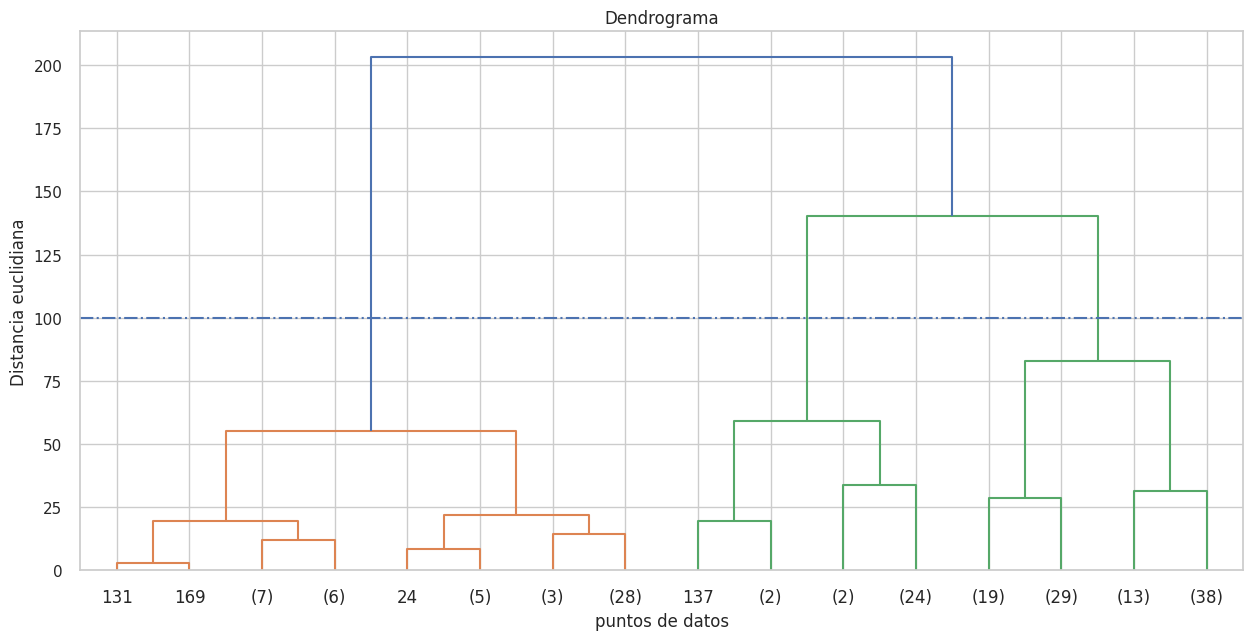

In [ ]:
# Llamada a la función Dendograma con datos de los hombres  y una línea horizontal a la altura de 100
Dendograma(Y,[100])

En el dendrograma presentado, se ha elegido una altura de 100 para dividir los datos en tres clusters principales. Esta elección se basa en la observación de la estructura del dendrograma, donde se identifican tres ramas significativas que se forman al nivel de 100 en la distancia euclidiana.

# **4. Caracterización de los datos**

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

# Crear el gráfico 3D de dispersión usando los datos de hombres
fig = px.scatter_3d(
    female_data,
    x="1995",
    y="2005",
    z="2015",
    color="Cluster",
    size="2005",
    title="Participación en la fuerza laboral (Mujeres)"
)
fig.show()

GRUPO 0:
                   Country  1995  2005  2015
2                  Algeria  11.8  12.8  15.2
10                 Bahrain  31.7  38.9  43.8
11              Bangladesh  24.8  27.8  32.4
19  Bosnia and Herzegovina  39.5  37.8  35.7
35                 Comoros  30.5  33.5  36.6
(38, 4)


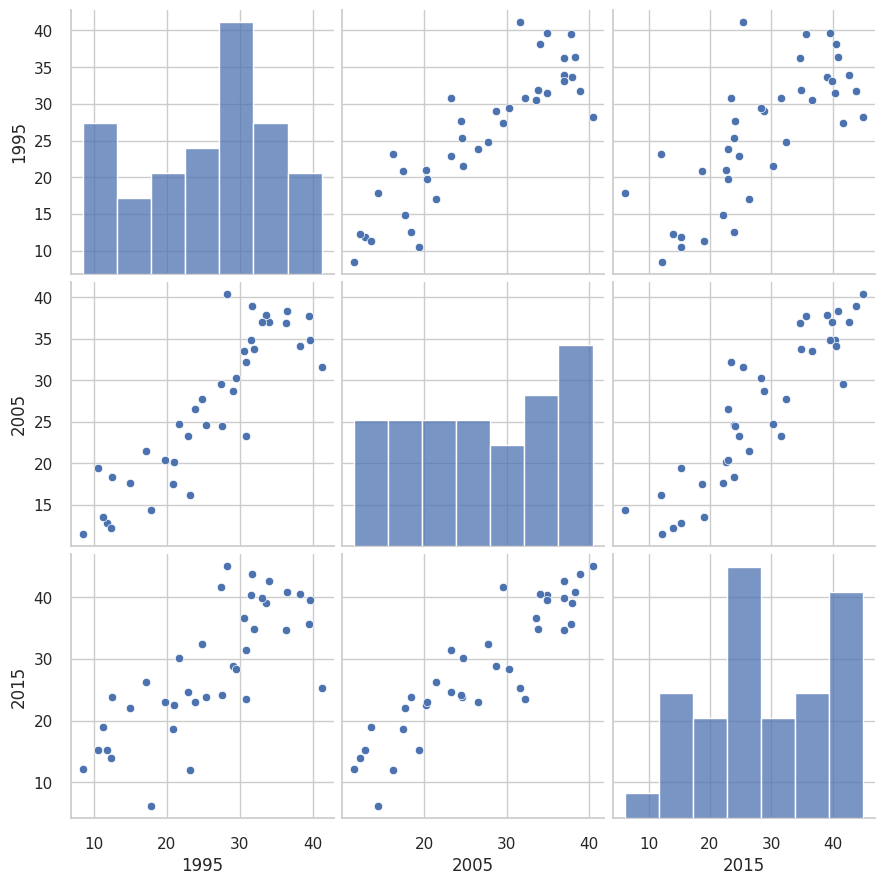

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Separar por etiquetas usando una máscara.
# Grupo 0
print("GRUPO 0:")

# Crear una máscara booleana para las filas donde 'Cluster' es 0
is_G = female_data['Cluster'] == 0

# Crear una versión de female_data sin la última columna
female_data_excl_last_col = female_data.iloc[:, :-1]

# Aplicar la máscara al DataFrame sin la última columna
C3_G = female_data_excl_last_col[is_G]

# Imprimir las primeras filas del subconjunto
print(C3_G.head())

# Imprimir la forma del subconjunto
print(C3_G.shape)

# Graficar el pairplot del subconjunto
sns.pairplot(C3_G,
             height=3,
             kind='scatter')
plt.show()


GRUPO 1:
         Country  1995  2005  2015
3         Angola  74.8  75.1  75.5
9        Bahamas  68.3  69.2  67.7
12      Barbados  63.8  64.2  61.9
16         Benin  59.9  67.3  68.7
24  Burkina Faso  72.9  62.4  58.4
(41, 4)


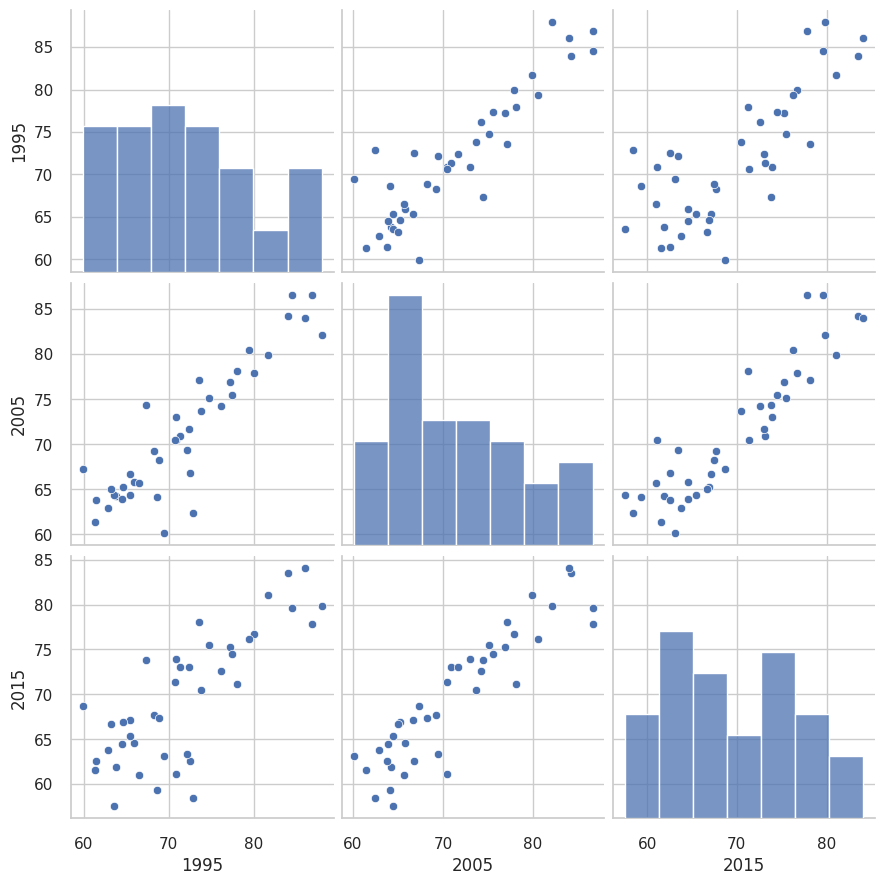

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Separar por etiquetas usando una máscara.
# Grupo 1
print("GRUPO 1:")

# Crear una máscara booleana para las filas donde 'Cluster' es 1
is_G = female_data['Cluster'] == 1

# Crear una versión de female_data sin la última columna
female_data_excl_last_col = female_data.iloc[:, :-1]

# Aplicar la máscara al DataFrame sin la última columna
C3_G = female_data_excl_last_col[is_G]

# Imprimir las primeras filas del subconjunto
print(C3_G.head())

# Imprimir la forma del subconjunto
print(C3_G.shape)

# Graficar el pairplot del subconjunto
sns.pairplot(C3_G,
             height=3,
             kind='scatter')
plt.show()


GRUPO 2:
       Country  1995  2005  2015
0  Afghanistan  43.0  44.0  47.0
1      Albania  53.8  48.1  47.7
4    Argentina  48.1  49.4  47.8
5      Armenia  48.7  47.5  51.2
6    Australia  53.7  57.1  59.1
(101, 4)


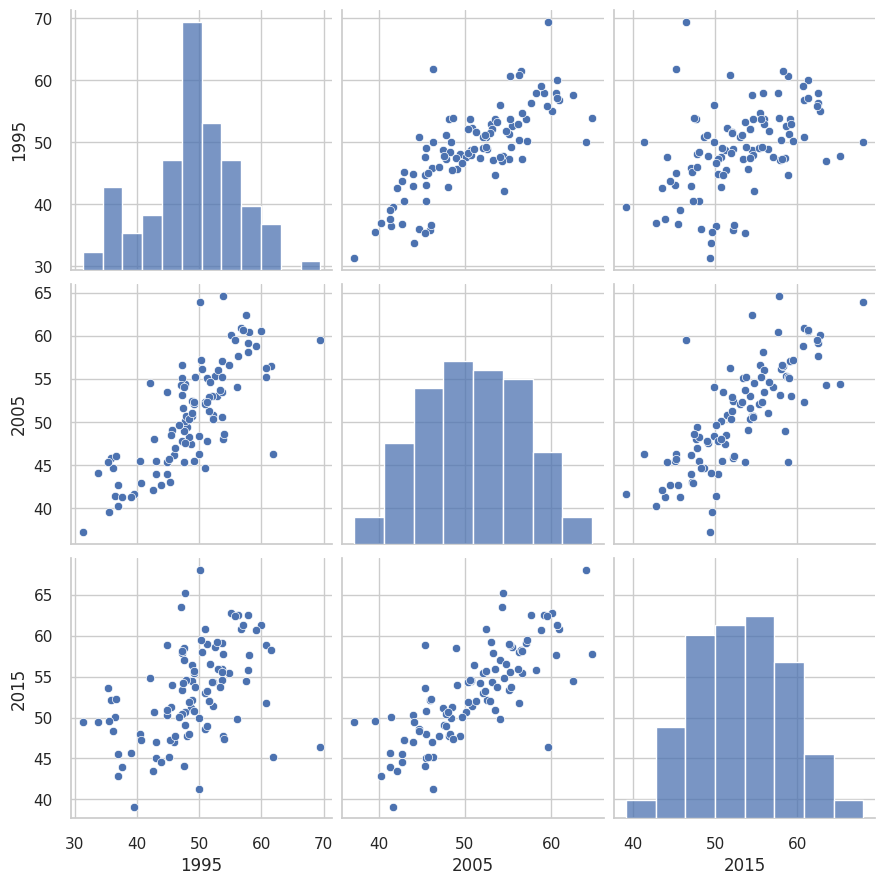

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Separar por etiquetas usando una máscara.
# Grupo 2
print("GRUPO 2:")

# Crear una máscara booleana para las filas donde 'Cluster' es 2
is_G = female_data['Cluster'] == 2

# Crear una versión de female_data sin la última columna
female_data_excl_last_col = female_data.iloc[:, :-1]

# Aplicar la máscara al DataFrame sin la última columna
C3_G = female_data_excl_last_col[is_G]

# Imprimir las primeras filas del subconjunto
print(C3_G.head())

# Imprimir la forma del subconjunto
print(C3_G.shape)

# Graficar el pairplot del subconjunto
sns.pairplot(C3_G,
             height=3,
             kind='scatter')
plt.show()


Podemos ver gracias a los datos en las graficas que los datos siguen una tendencia marcada, los paises que en el año 1995 tenian baja fuerza laboral en mujeres, mantuvieron esa tendencia durante los años hasta 2015, y lo mismo con los paises que tenian una alta fuerza laboral entre mujeres, se mantuvo esa tendencia, aunque es de puntualizar que en la mayoria de los casos la fuerza laboral subio proporcionalmente para todos los paises.

Los clusters separaron los paises en 3 partes muy marcadas, siendo que el primer cluster tomo a los paises que han mantenido una fuerza laboral media durante los años, el segundo cluster tomo a los paises que mantuvieron una fuerza laboral baja durante los años y el tercer cluster tomo a los paises que tuvieron una fuerza laboral alta durante los años.

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

# Crear el gráfico 3D de dispersión usando los datos de mujeres
fig = px.scatter_3d(
    male_data,
    x="1995",
    y="2005",
    z="2015",
    color="Cluster",
    size="2005",
    title="Participación en la fuerza laboral (Hombres)"
)
fig.show()


GRUPO 0:
       Country  1995  2005  2015
2      Algeria  77.7  71.8  67.4
4    Argentina  75.0  75.6  73.4
6    Australia  74.0  72.2  71.1
8   Azerbaijan  72.0  68.4  68.7
12    Barbados  77.5  75.4  69.9
(72, 4)


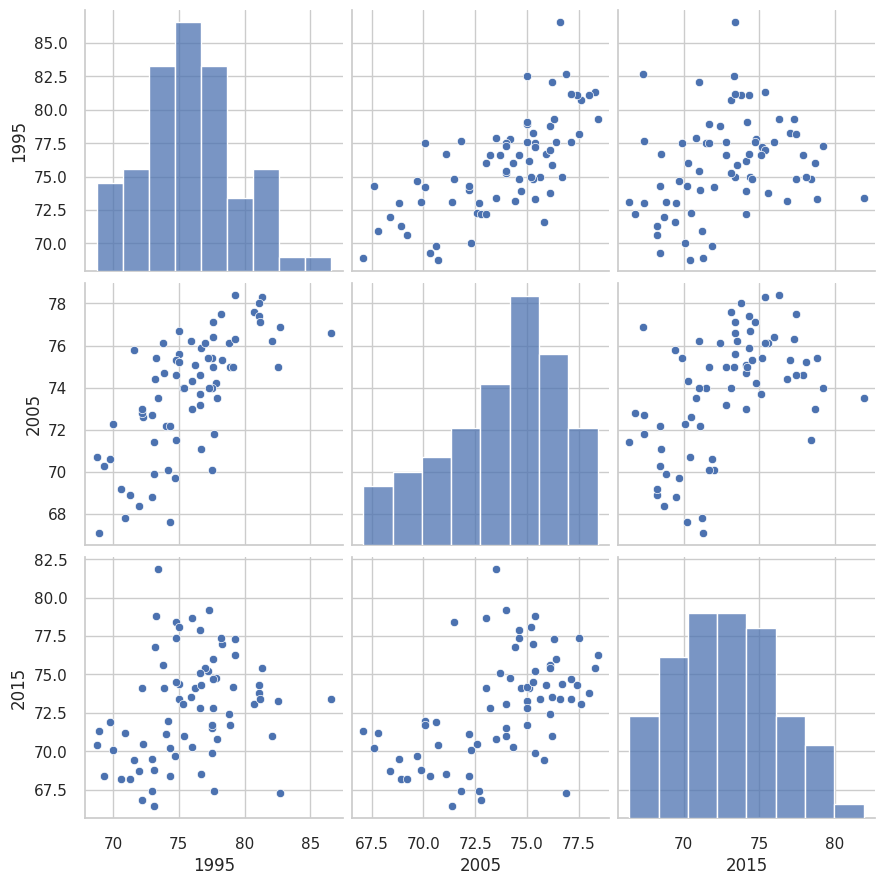

In [ ]:
# Separar por etiquetas usando una máscara.
# Grupo 0
print("GRUPO 0:")

# Crear una máscara booleana para las filas donde 'Cluster' es 0
is_G = male_data['Cluster'] == 0

# Crear una versión de male_data sin la última columna
male_data_excl_last_col = male_data.iloc[:, :-1]

# Aplicar la máscara al DataFrame sin la última columna
C3_G = male_data_excl_last_col[is_G]

# Imprimir las primeras filas del subconjunto
print(C3_G.head())

# Imprimir la forma del subconjunto
print(C3_G.shape)

# Graficar el pairplot del subconjunto
sns.pairplot(C3_G,
            height=3,
            kind='scatter')
plt.show()

GRUPO 1:
    Country  1995  2005  2015
1   Albania  73.9  67.9  65.2
5   Armenia  69.2  65.9  70.2
7   Austria  70.3  66.1  66.0
13  Belarus  66.8  67.3  71.0
14  Belgium  61.0  61.3  59.1
(52, 4)


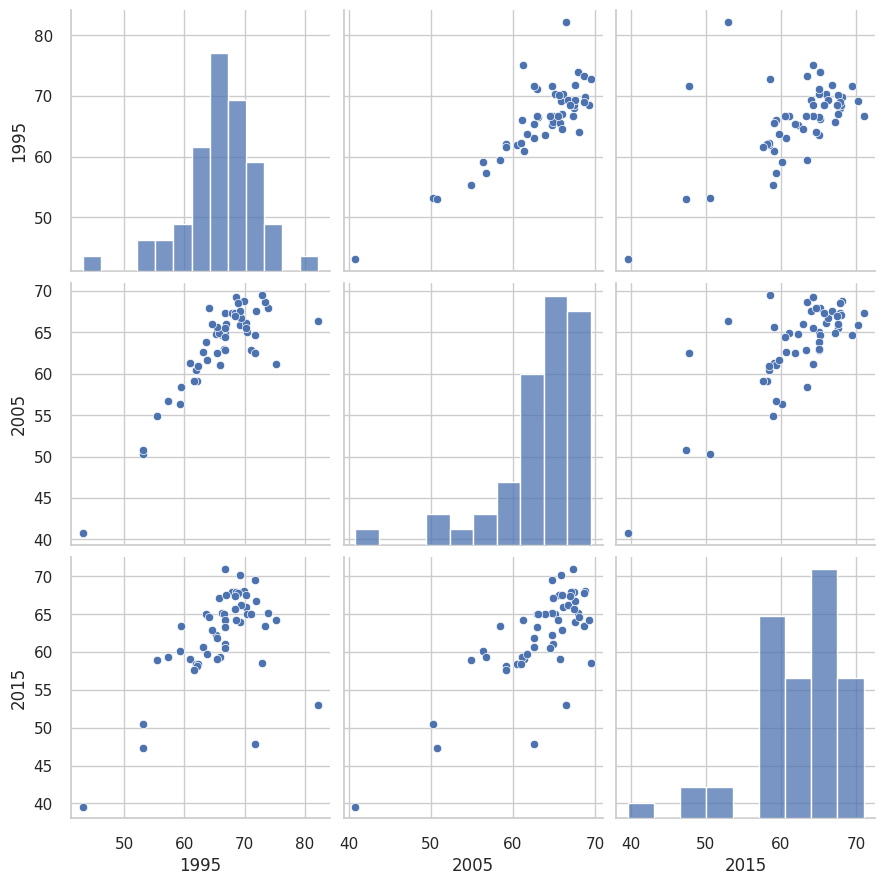

In [ ]:
# Separar por etiquetas usando una máscara.
# Grupo 1
print("GRUPO 1:")

# Crear una máscara booleana para las filas donde 'Cluster' es 1
is_G = male_data['Cluster'] == 1

# Crear una versión de male_data sin la última columna
male_data_excl_last_col = male_data.iloc[:, :-1]

# Aplicar la máscara al DataFrame sin la última columna
C3_G = male_data_excl_last_col[is_G]

# Imprimir las primeras filas del subconjunto
print(C3_G.head())

# Imprimir la forma del subconjunto
print(C3_G.shape)

# Graficar el pairplot del subconjunto
sns.pairplot(C3_G,
            height=3,
            kind='scatter')
plt.show()

GRUPO 2:
        Country  1995  2005  2015
0   Afghanistan  82.5  83.1  82.3
3        Angola  81.0  80.5  80.4
9       Bahamas  82.3  81.3  82.1
10      Bahrain  87.7  86.2  87.0
11   Bangladesh  87.6  85.5  80.4
(56, 4)


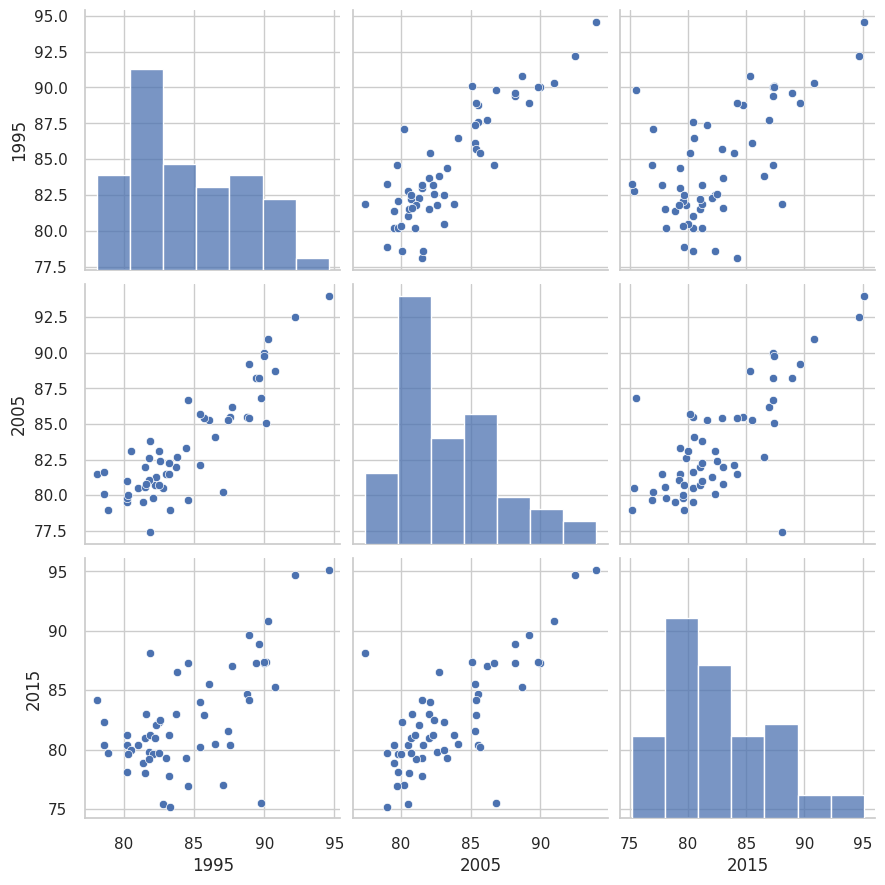

In [ ]:
# Separar por etiquetas usando una máscara.
# Grupo 2
print("GRUPO 2:")

# Crear una máscara booleana para las filas donde 'Cluster' es 2
is_G = male_data['Cluster'] == 2

# Crear una versión de male_data sin la última columna
male_data_excl_last_col = male_data.iloc[:, :-1]

# Aplicar la máscara al DataFrame sin la última columna
C3_G = male_data_excl_last_col[is_G]

# Imprimir las primeras filas del subconjunto
print(C3_G.head())

# Imprimir la forma del subconjunto
print(C3_G.shape)

# Graficar el pairplot del subconjunto
sns.pairplot(C3_G,
            height=3,
            kind='scatter')
plt.show()

Podemos ver con las graficas que los hombres siguen una tendencia muy parecida a la de las  mujeres, en la cual los paises que tenian una fuerza laboral alta en 1995 mantuvieron esa tendencia con los años, y lo mismo con los paises que tenian una fuerza laboral baja, viendo que en general, la mayoria de paises aumento proporcionalmente su fuerza laboral con el tiempo

Podemos ver como el primer cluster recogio a los paises que mantuvieron con los años una fuerza laboral baja, el segundo cluster recogio a los paises que con los años mantuvo una fuerza laboral alta entre los hombres y el tercer cluster tomo a los paises que mantuvo un nivel de fuerza laboral medio

# **5. Tendencias en los datos**

Podemos ver en ambos datasets y sus clusters que los datos siguen ciertas tendencias marcadas:

1. Durante los 20 años que son revisados, los datos muestran un crecimiento continuo en la fuerza laboral tanto de hombres como de mujeres de manera generalizada a todos los paises del dataset.

2. Aunque ha habido un crecimiento general en la fuerza laboral, la proporción de países con cifras bajas en 1995 se mantuvo baja en 2015. Esto indica que las diferencias iniciales entre los países en términos de participación laboral han persistido a lo largo del tiempo.

3. Al analizar la participación laboral femenina, se observa que los países del clúster 0, que tienen una menor fuerza laboral femenina durante los 20 años revisados, son economías muy fuertes como Estados Unidos y Rusia.

4. En contraste, los países con economías más débiles suelen tener una participación laboral femenina significativamente más alta. Ejemplos de estos países incluyen Venezuela y Pakistán.

5. La tendencia en la participación laboral de los hombres difiere notablemente de la de las mujeres. La fuerza laboral masculina es significativamente más alta en países con un desarrollo alto, como Estados Unidos, Alemania y Australia. Esto sugiere que, en estos países, los hombres aún dominan el mercado laboral.